## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_data_complete.head(30)
# mouse_metadata.describe()
# study_results.describe()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_drug = mouse_data_complete.groupby(["Drug Regimen"])
mean_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].mean(), 2)).rename(columns={"Tumor Volume (mm3)" : "Mean"})
median_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].median(), 2)).rename(columns={"Tumor Volume (mm3)" : "Median"})
variance_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].var(), 2)).rename(columns={"Tumor Volume (mm3)" : "Variance"})
std_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].std(), 2)).rename(columns={"Tumor Volume (mm3)" : "Standard Deviation"})
sem_drug = pd.DataFrame(round(mouse_data_drug['Tumor Volume (mm3)'].sem(), 2)).rename(columns={"Tumor Volume (mm3)" : "SEM"})
data = [mean_drug, median_drug, variance_drug, std_drug, sem_drug]
df_merged = pd.concat(data, join='outer', axis=1)
df_merged


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

<IPython.core.display.Javascript object>


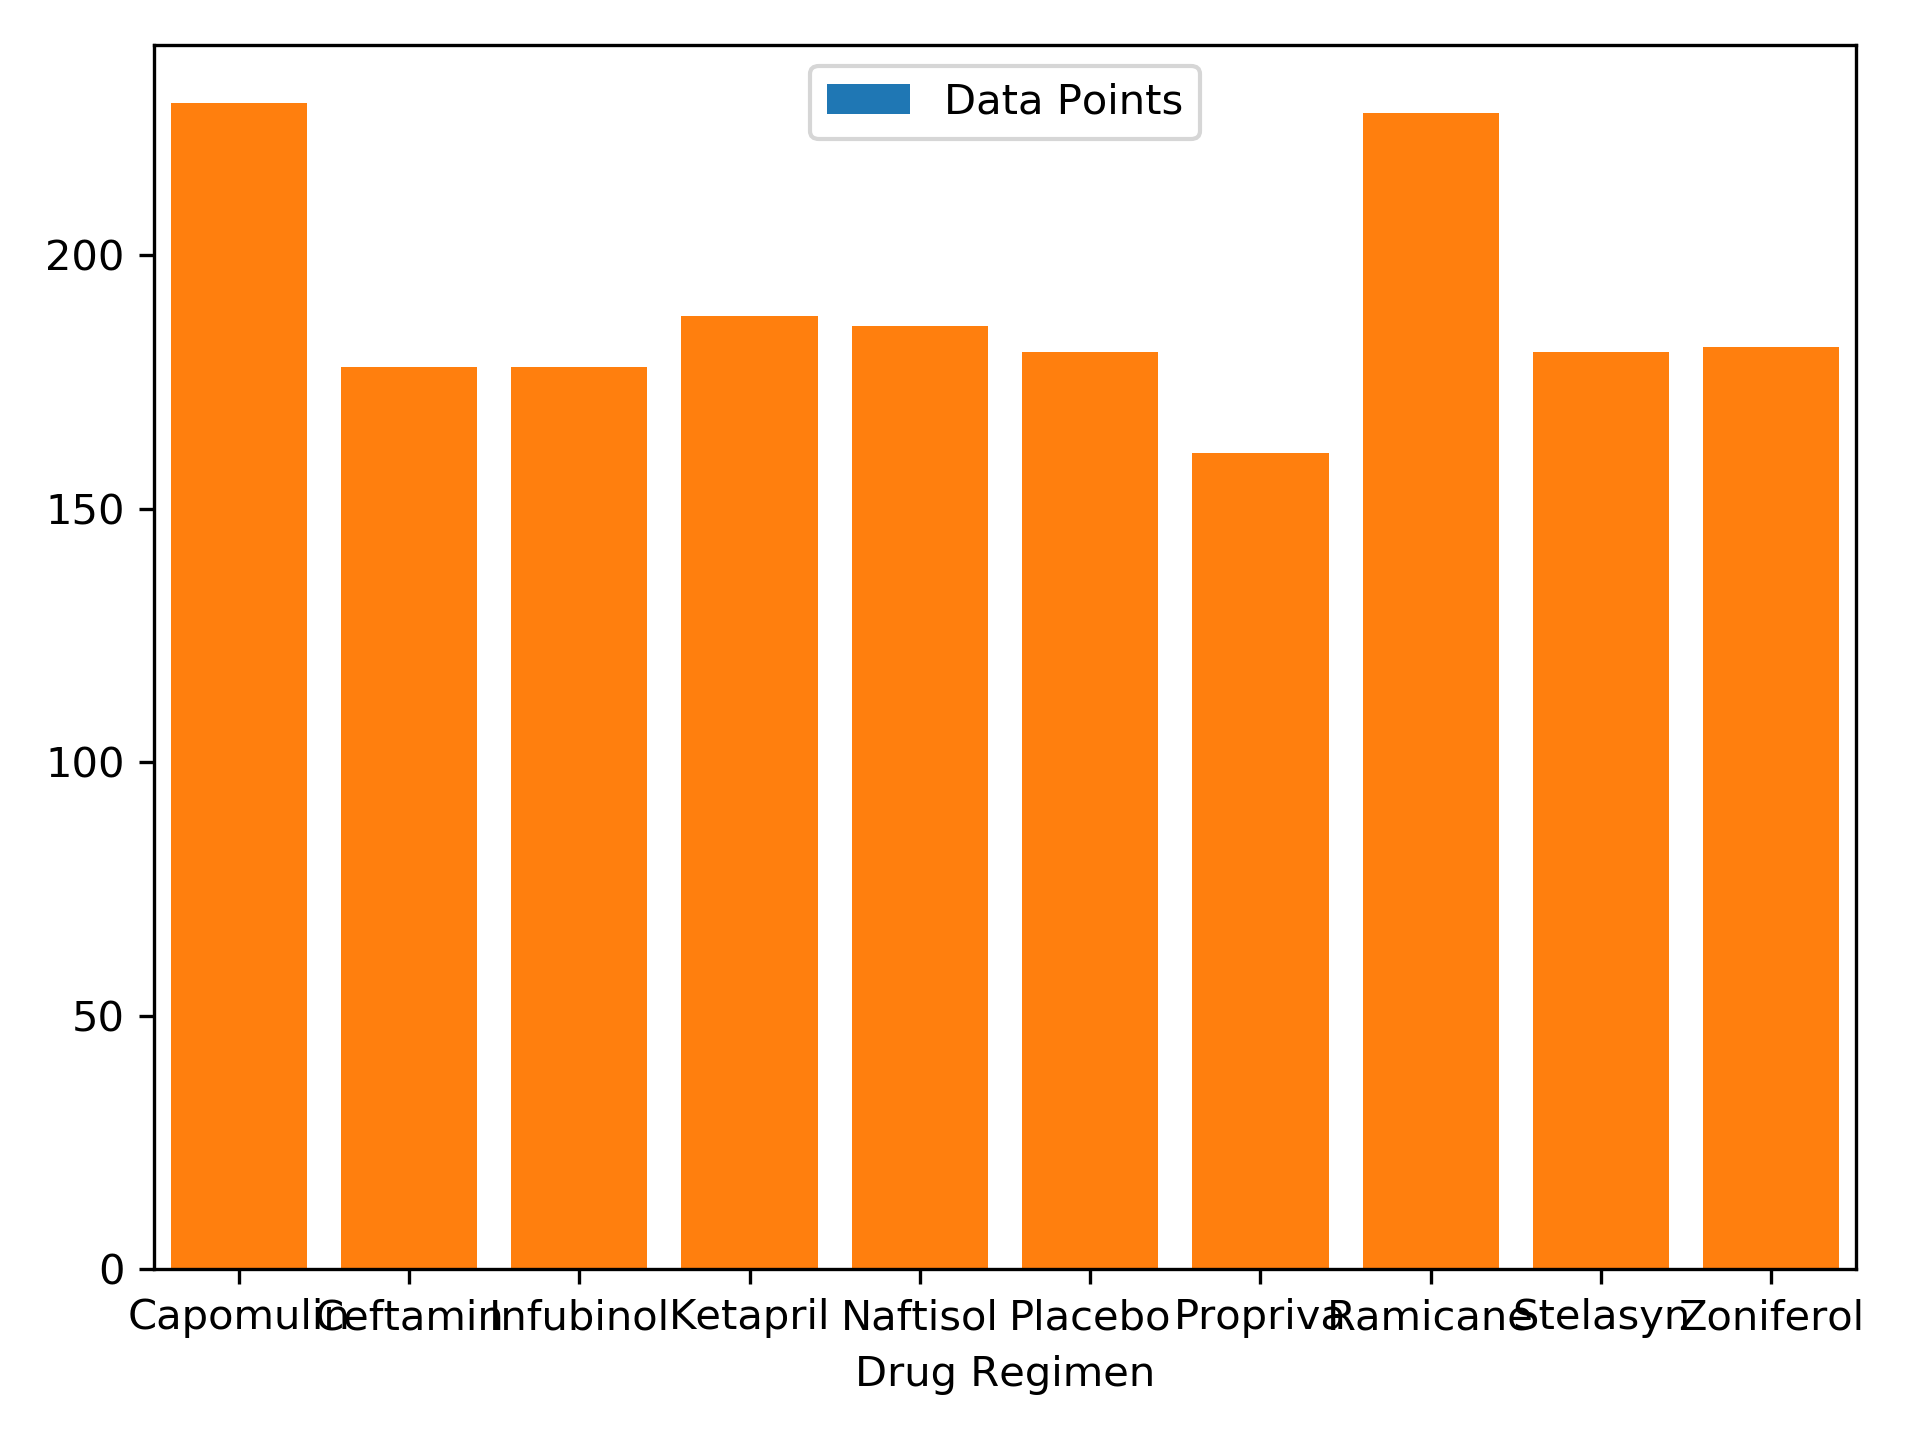

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count= mouse_data_drug.count()
drug_count= pd.DataFrame(drug_count["Mouse ID"])
drug_count= drug_count.rename(columns={"Mouse ID": "Data Points"})
drug_count
pbar = drug_count.plot.bar(rot=0)
pbar


In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using 
# plt.bar(mouse_data_drug, drug_count)
drug_name = mouse_data_complete["Drug Regimen"].unique()
drug_name
series= drug_count.iloc[:,0]
x_axis = np.arange(len(drug_name))
plt.bar(x_axis, drug_count["Data Points"])
plt.tight_layout()


## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen